<a href="https://colab.research.google.com/github/rosh4github/eportfolio/blob/main/RK_Unit04_demo_correlation_regression_fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:

Unit 4 - Machine Learning module - University of Essex Online (2024)

Gemini (2024) Gemini response to Roshni Kasturi. 29 October.

## Importing the required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# pylab - part of matplotlib (for visualizations)
# convenience module - originally designed to give MATLAB-like experience within Python
import pylab as pl
import numpy as np

# seaborn - library for creating statistical visualizations. popular in data science for aesthic plot quality
# sns - alias / shortform for ease of use within code
import seaborn as sns

## Load the data

In [ ]:
# Reading the data
df=pd.read_csv("/content/Unit04 FuelConsumption.csv")

In [ ]:
# Take a look at the dataset
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# corr() - method - built in function for pandas dataframes - calculates correlation b/w all numerical columns in df
# corr() method by default tries to include all columns in the correlation calculation, but can only handle numeric data, so attempts to convert all non-numeric data to float
# pass numeric_only=True to the method to prevent error
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


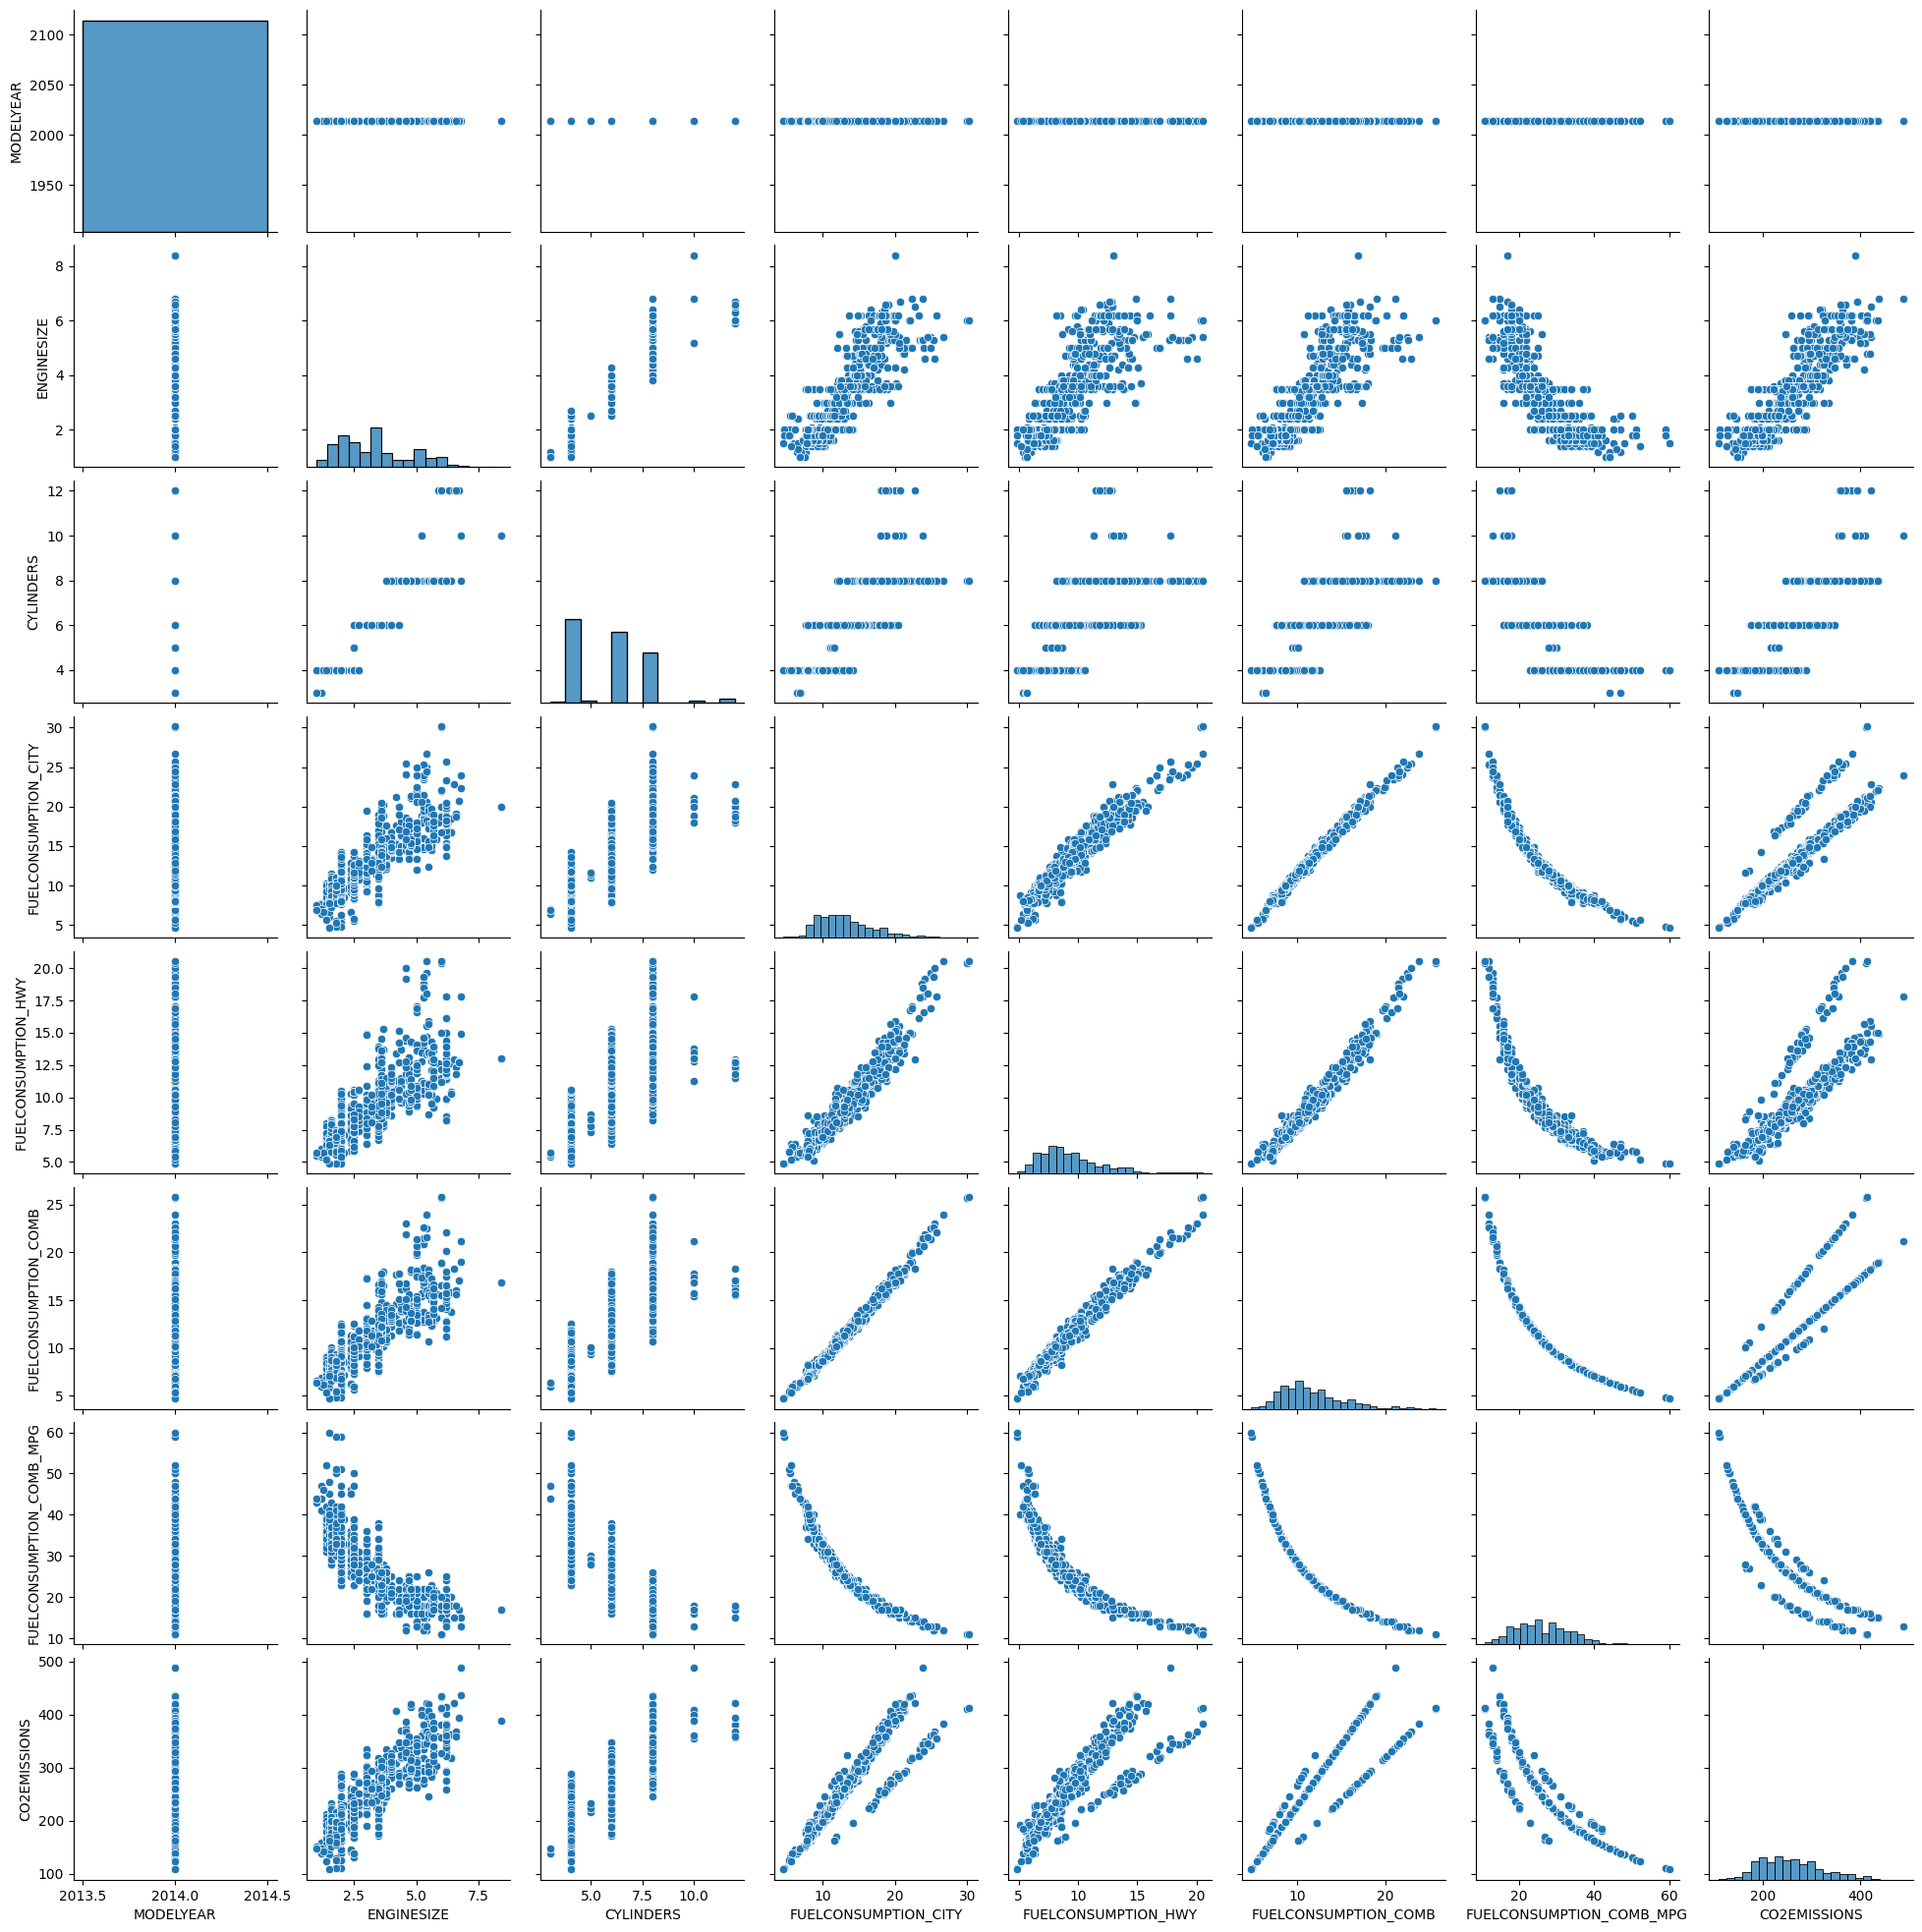

In [ ]:
# pairplot() creates a grid of plots showing relationships b/w two variables (as a scatter plot)
# diagnonal plots are histograms ( or kernel density estimations) showing the distribution of a single variable - helps understand spread and frequency of values for each column
sns.pairplot(df)

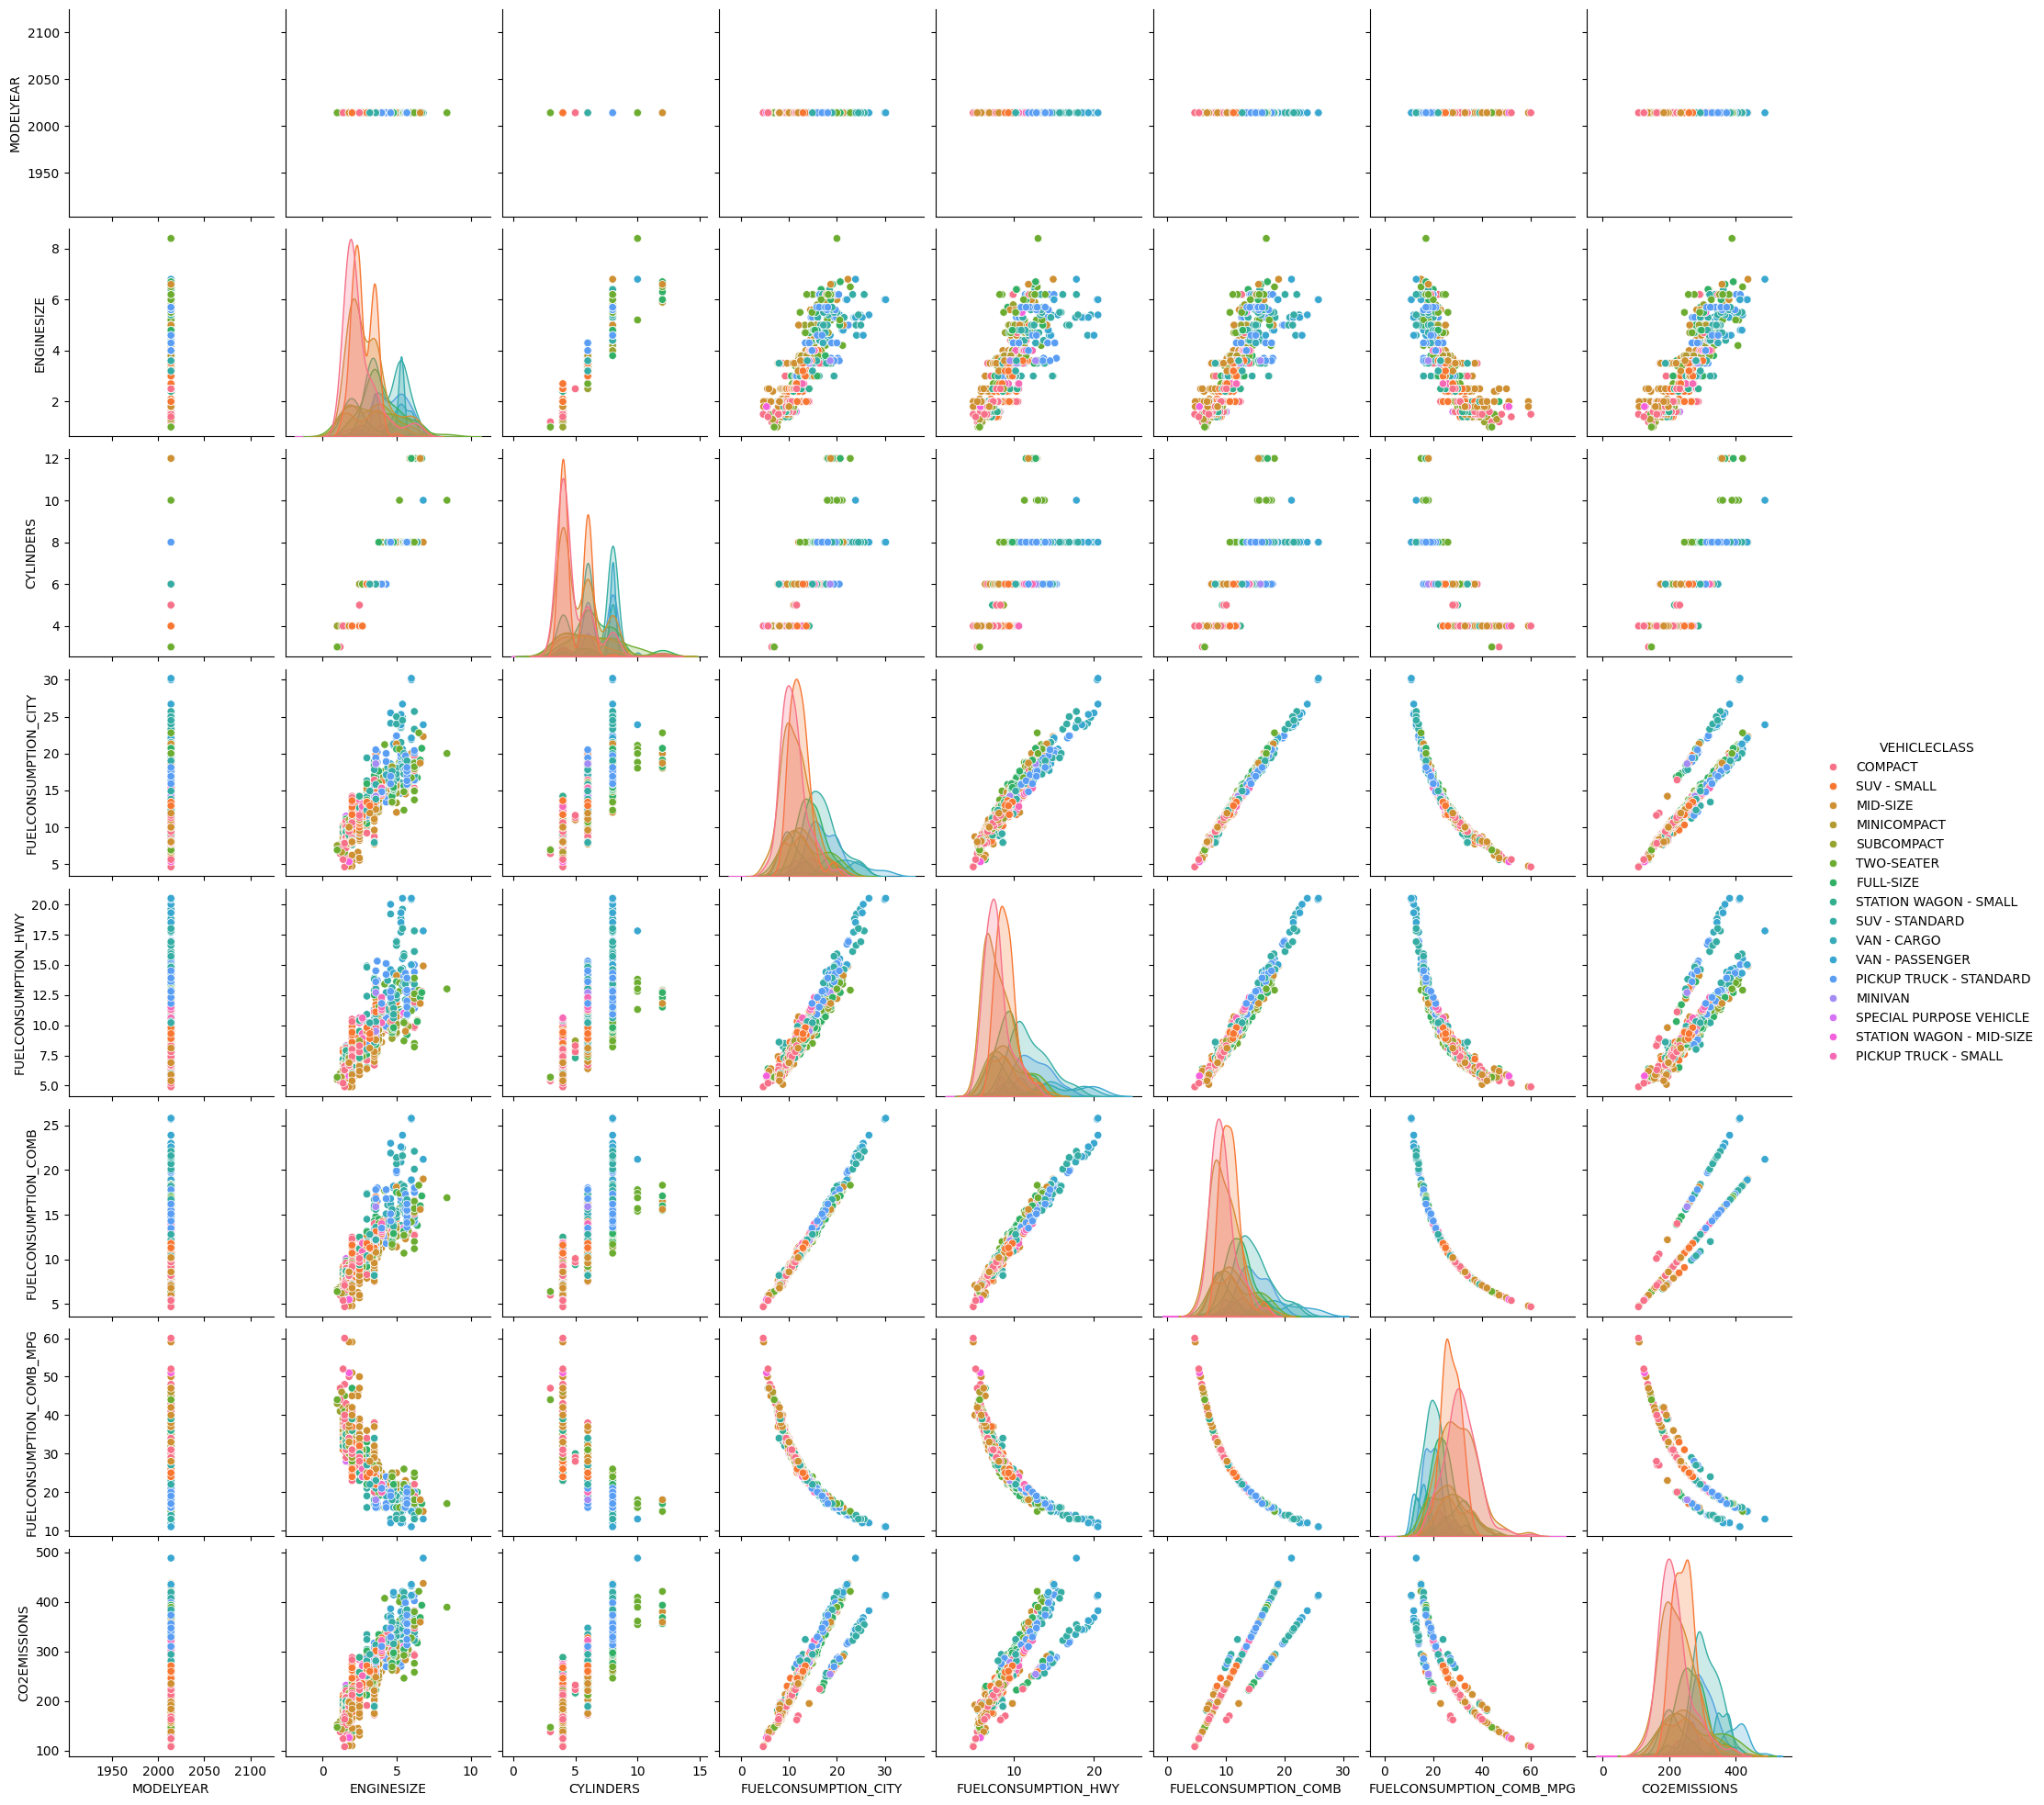

In [ ]:
# hue = "VEHICLECLASS" tells sns.pairplot() to color the points in the plots based on the values in the VEHICLECLASS column of df
# allows to visually see how relationship b/w variables might differ across different vehicle classes
sns.pairplot(df, hue = "VEHICLECLASS")

Text(0.5, 1.0, 'Correlation Heatmap')

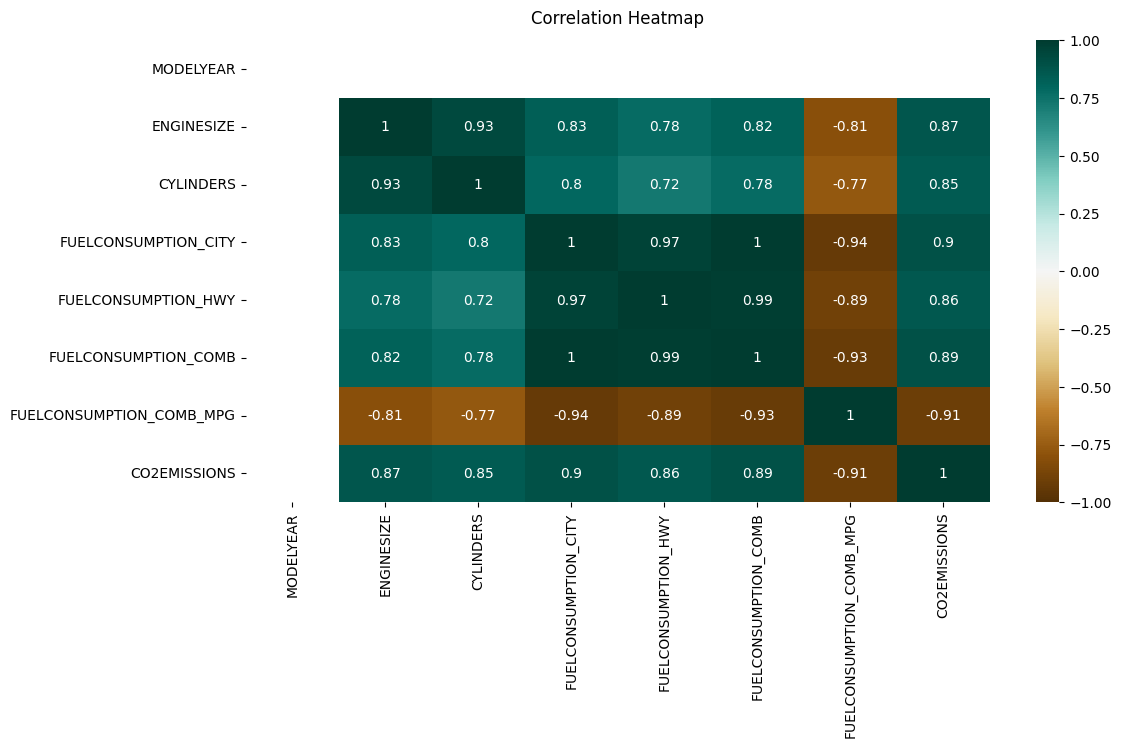

In [ ]:
# creates a new figure object / blank canvas; figsize argument expects a tuple - first element width, second height (in inches)
plt.figure(figsize=(12, 6))

# df.corr correlation matrix used as an input for heatmap

# color intensity variables:
# vmin=-1 sets the minimum value of the color scale to -1
# vmax=1 sets the maximum value of the color scale to 1
# annot=True shows the annotation in each cell
# cmap defines the color map used for the heatmap (BrBG - diverging color palette - uses two contrasting colors brown and blue green; lighter colors near zero correlation)
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# fontdict - dictionary allows to customize font properties of title herein
# pad=12 controls spacing between title and top of heatmap (12 units of padding) for visual separation
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Plot to check the linearity

## Data exploration

In [ ]:
# Summarise the data

# .describe - built in function to generate descriptive stats of numerical columns in df
print(df.describe())

# new subset df called cdf (for the regression model)
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


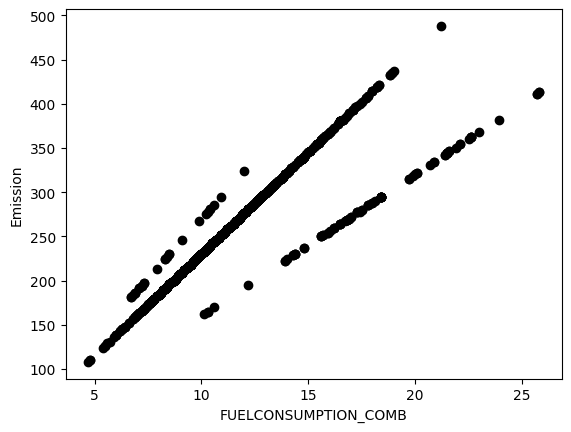

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

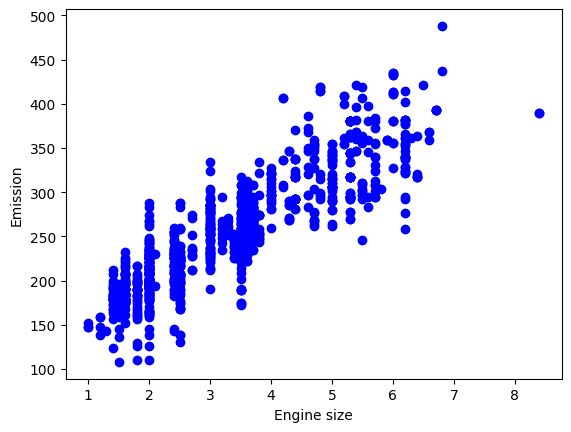

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

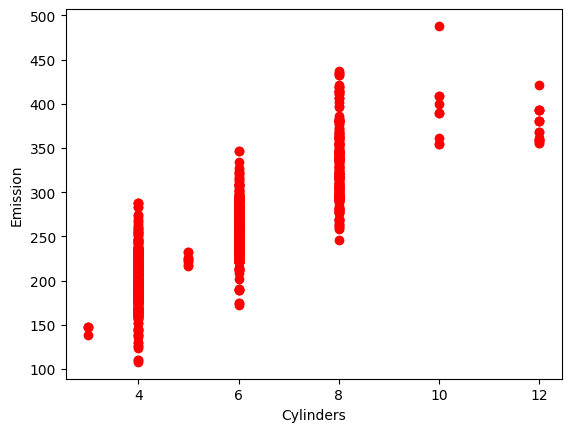

In [ ]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


Which of the above variables do you think will work best to explain a linear relation with CO2 emission?

## Demo 2. Regression

## Train-test data preparation

In [ ]:
# creating a random mask for data splitting b/w training and testing sets (approx 80% of the rows will be marked as True, rest False, due to the comparison w/0.8)
# np.random.rand(len(df)) - generates an array of random numbers b/w 0 and 1. Without len(df), it will produce a single random number b/w 0 and 1. Or it can take rows,columns arguments
# len(df) - ensures that the array has the same length as the dataset (df)
# <0.8 - compares each random number in the array to 0.8 - if the random no. is less than 0.8 = True, else False
# msk - variable - often referred to as a "mask" b/c used to select rows from data
# random = module within NumPy; rand - function within random module
msk=np.random.rand(len(df))<0.8

# creating the training set
# msk variable used to select rows from cdf (dataset containing the features and target variable for the regression model)
# new variable train = training dataframe
train=cdf[msk]

# creating the testing set
# ~msk - inverts the mask (True values become False and vice versa) - inverted mask
# now rows corresponding to the original False values (about 20% of data) will be included
# test dataframe will evaluate performance of trained regression model on unseen data
test=cdf[~msk]

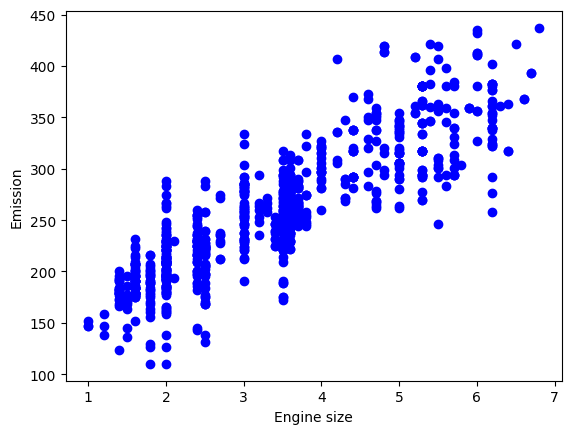

In [ ]:
# Train data distribution
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Using sklearn package for data modelling

In [ ]:
# Importing the Linear Regression Model

# sklearn (scikit-learn) - library for ML tasts
from sklearn import linear_model

# creates an instance of the LinearRegression class and assigns it to variable regr
regr=linear_model.LinearRegression()

# Preparing the data for training

# prepares the input features (independent variable) for training the model
# train[['ENGINESIZE']] selects that column from train df - feature will be used to predict CO2 emissions
# np.asanyarray() - converts selected data into a NumPy array (so sklearn can efficiently work w/that format)
# train_x now holds engine sizes for the training data
train_x=np.asanyarray(train[['ENGINESIZE']])

# prepares the target variable for training
train_y=np.asanyarray(train[['CO2EMISSIONS']])

# Training the Model

# tells the regr (LinearRegression) object to "learn" the relationship b/w train_x and train_y
# fit method adjusts the model's internal parameters (coefficients and intercept) to find the best line that fits the training data
regr.fit(train_x, train_y)

# Getting the results

# prints the coefficients of the linear regression model
# since using only one feature (Engine size), there will be 1 coefficient (= represents slope of line = how much CO2 emissions are expected to change for a one-unit change in engine size)
# _ = attributes that are estimated or learned during the model fitting process (using regr.fit) in scikit-learn are conventionally named with a training underscore
print('Coefficients:', regr.coef_)

# prints the intercept of the linear regression model (intercept = value of the predicted CO2 emissions when engine size = 0) = where regression line crosses the y-axis
print('Intercept:', regr.intercept_)

Coefficients: [[39.48185502]]
Intercept: [124.82627731]


Text(0, 0.5, 'Emission')

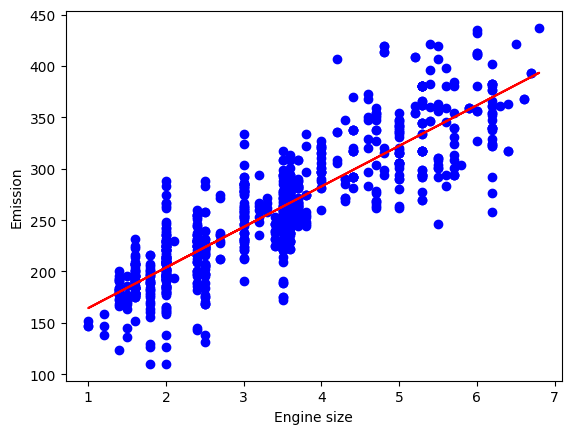

In [ ]:
# Plot outputs
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')

# plt used for plotting a line (representing the trained linear regr model) on the graph

# below - for calculating y coordinates for the line plot - equation of the line defined by the linear regr model
# regr.coef_[0][0]: "The coef_ attribute of the regr object stores the coefficients, and [0][0] is used to access the specific coefficient for engine size (the only feature used in this model). It represents the slope of the line." (Gemini, 2024)
# -r: format string; - indicates solid line, r indicates color red
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model evaluation

In [ ]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

# Making predictions

# takes the test input features and returns the predicted CO2 emission values
test_y_ = regr.predict(test_x)

In [ ]:
# MAE measures average difference b/w predicted and actual values:
# test_y_-test_y - residual or error
# absolute value function applied to each element of the resulting array
# mean - calculates average of all absolute errors (MAE)
# %.2f - placeholder to be replaced by final values (2 decimal) [%... inserts the MAE value into the format string]
# lower MAE (and MSE below) - better model performance - predictions are closer to the real values
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_-test_y)))

# MSE evaluates performance of regression models
# residuals are squared to 1. eliminate negative values, 2. penalizes larger errors more heavily than smaller errors
# mean - calculates average of all squares residuals (MSE) - represents average squared difference b/w predicted and actual values
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)**2))

#
print("R2-score: %.2f" % r2_score(test_y_,test_y))

Mean absolute error (MAE): 24.71
Residual sum of squares (MSE): 990.60
R2-score: 0.71


## Nonlinear regression

#### Importing required dataset

In [ ]:
df=pd.read_csv("china_gdp.csv")
df.head(10)

#### Plotting the dataset

In [ ]:
plt.figure(figsize=(8,5))

# df["Year"].values = gets "year" column values and assigns them to x_data
# df["Value"].values = gets "value" column representing GDP
x_data,y_data=(df["Year"].values,df["Value"].values)

# r - red, o - circles
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Normalisation

# "xdata=x_data/max(x_data): This line normalizes the x_data (Year) by dividing each value by the maximum value in x_data. This scales the data to a range between 0 and 1" (Gemini, 2024).
# "ydata=y_data/max(y_data): This line does the same normalization for y_data (GDP), scaling it to a range between 0 and 1" (Gemini, 2024).
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

plt.plot(xdata,ydata,'b')

Roughly looking look at the data visualisation, it appears that the logistic function could be a good representation for this very dataset. The logistic function has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

#### Implement the logistic function

In [ ]:
# logistic function; used in 1. logistic regression (to predict the probability of a binary outcome yes/no/T/F)
# 2. neural networks (as an activation function in neurons to introduce non-linearity and map inputs to a range b/w 0 and 1)
# 3 input arguments: x - input variable; Beta_1 - controls steepness of sigmoid curve; Beta_2 - controls shift of the sigmoid curve along the x-axis
def sigmoid(x,Beta_1,Beta_2):

    # calculates output of the sigmoid function
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))

    # returns the output of the sigmoid function
    return y

#### Fit the logistic function on this dataset and estimate the relevant parameters

beta_1=690.451712,beta_2=0.997207


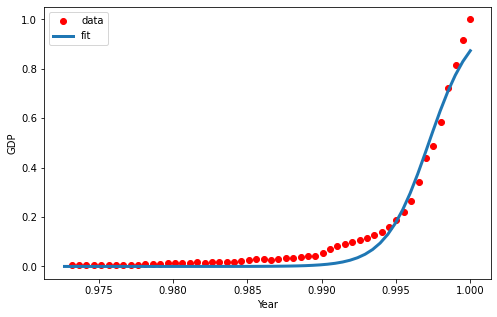

In [ ]:
# Importing curve_fit

# scipy - library for scientific computing; curve_fit - used for fitting a curve to a set of data points
from scipy.optimize import curve_fit

# Fitting the sigmoid function

# sigmoid - logistic curve you want to fit to your data; xdata - normalized independent variable data 'Year'
# ydata - normalized dependent variable data 'GDP'
# "The curve_fit function attempts to find the optimal parameters for the sigmoid function that best fit the relationship between xdata and ydata (Gemini, 2024)"

# "popt, pcov = ...: The results of the curve_fit function are assigned to two variables:
# - popt: This variable stores the optimal values for the parameters of the sigmoid function (Beta_1 and Beta_2 in your case). These are the values that make the sigmoid curve best match the data.
# - pcov: This variable (which isn't used directly in this code snippet) stores the estimated covariance of the parameters. It provides information about the uncertainties in the estimated parameter values (Gemini, 2024).
popt,pcov=curve_fit(sigmoid,xdata,ydata)

print("beta_1=%f,beta_2=%f"%(popt[0],popt[1]))

##
# np.linspace - creates a sequence of evenly spaced numbers
# array named x containing 55 evenly spaced values b/w 1960 and 2015 (years for plotting)
x=np.linspace(1960,2015,55)

# normalizing
x=x/max(x)


plt.figure(figsize=(8,5))

# calculates the predicted values (y) using sigmoid function; x - normalized year values
# *popt - unpacks optimized parameters obtained from a previous curve fitting step, passing them as arguments to sigmoid function
y=sigmoid(x,*popt)

# label='data' provides a label for the data points in the legend
# original data points
plt.plot(xdata,ydata,'ro',label='data')

# fitted sigmoid curve
# label='fit' provides a label for the fitted curve in the legend
plt.plot(x,y,linewidth=3.0,label='fit')

# displays legend on the plot
# loc='best' - "instructs Matplotlib to automatically place the legend in a location that minimizes overlap with the plot elements (Gemini, 2024)"
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()